In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

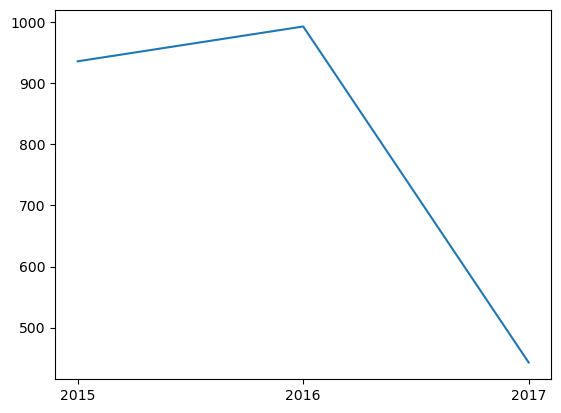

2015 936
2016 993
2017 443


In [59]:
df = pd.read_csv('startup_funding.csv')
df.head(2)
year=df.Date.str[-4::]
year=np.array(year)
year,funds=np.unique(year,return_counts=True)

plt.plot(year,funds)
plt.show()
for i,j in zip(year,funds):
    print(i,j)

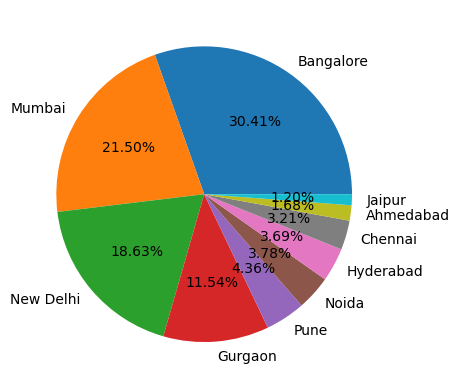

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [60]:
df = pd.read_csv('startup_funding.csv')

locations = df['CityLocation'].dropna()

locations = locations.str.split('/',expand=True)[0]
locations = locations.str.strip()
locations = locations.replace('bangalore','Bangalore')
locations = locations.replace('Delhi','New Delhi')

jobs = locations.value_counts().values[:10]
Locations = locations.value_counts().index[:10]

plt.pie(jobs,labels=Locations,autopct='%.2f%%')
plt.show()

for i,j in zip(Locations,jobs):
    print(i,j)

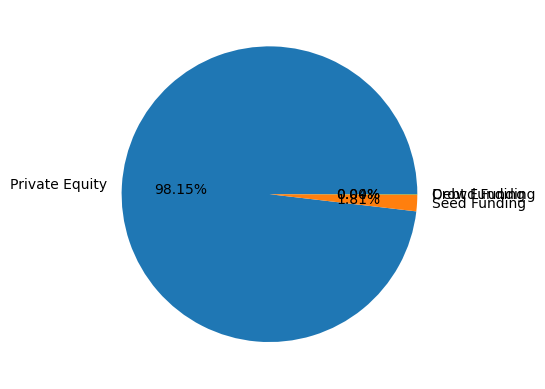

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv')
df.dropna(subset=['InvestmentType', 'AmountInUSD'], inplace=True)
amountInUSD = df['AmountInUSD'].str.replace(',','')
amountInUSD = amountInUSD.astype(int)

investments = df['InvestmentType']
investments = investments.str.strip()
investments = investments.replace('Crowd funding','Crowd Funding')
investments = investments.replace('PrivateEquity','Private Equity')
investments = investments.replace('SeedFunding','Seed Funding')

investments_amount = {}
for invest,value in zip(investments,amountInUSD):
    investments_amount[invest] = investments_amount.get(invest,0)+value
    
investors = investments_amount.keys()
amount = investments_amount.values()

pie = plt.pie(amount,labels=investors,autopct='%.2f%%')
plt.show()
for i,j in zip(investors,pie[2]):
    value = format(float(j.get_text()[:-1]),'.2f')
    print(i,value)

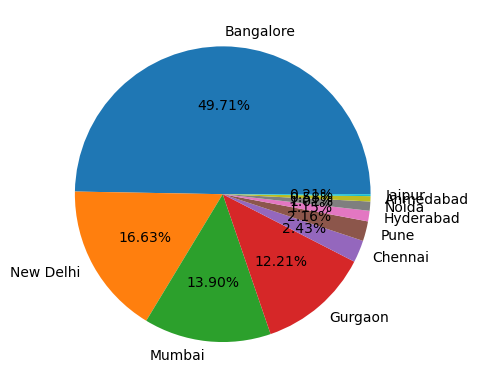

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv')

df.dropna(subset=['CityLocation','AmountInUSD'],inplace=True)

cities = df['CityLocation'].str.split('/',expand=True)[0]
cities = cities.str.strip()
cities = cities.replace('bangalore','Bangalore')
cities = cities.replace('Delhi','New Delhi')

amountinUsd = df['AmountInUSD'].str.replace(',','').astype(int)

cities_amount = {}
for city,amount in zip(cities,amountinUsd):
    cities_amount[city] = cities_amount.get(city,0)+amount
    
cities=np.array(list(cities_amount.keys()))
amount=np.array(list(cities_amount.values()))

indexes=np.argsort(amount)[::-1]
indexes=indexes[:10]

cities=cities[indexes]
amount=amount[indexes]

pie = plt.pie(amount,labels=cities,autopct='%.2f%%')
plt.show()
for i,j in zip(cities,pie[2]):
    value = format(float(j.get_text()[:-1]),'.2f')
    print(i,value)

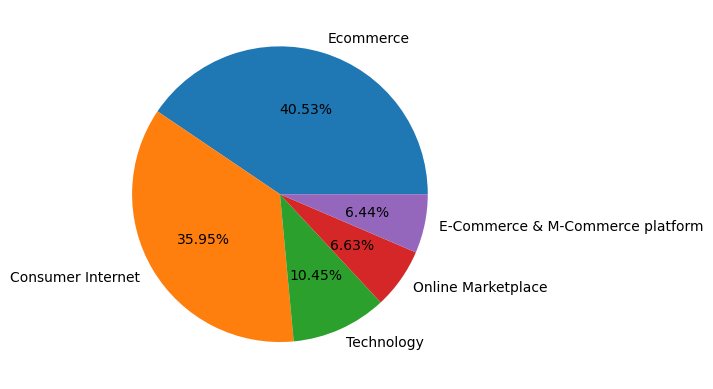

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv')
df.dropna(subset=['IndustryVertical','AmountInUSD'],inplace=True)

replace_dict = {'eCommerce':'Ecommerce',
                'ecommerce':'Ecommerce',
                'ECommerce':'Ecommerce'}

df['IndustryVertical'].replace(replace_dict,inplace=True)
df['AmountInUSD'] = df['AmountInUSD'].str.replace(',','').astype(int)

grouped = df.groupby('IndustryVertical')
industries_amount = grouped['AmountInUSD'].sum()
industries_amount = industries_amount.sort_values(ascending=False)[:5]

industries = industries_amount.index
amount = industries_amount.values
pie = plt.pie(amount,labels=industries,autopct='%.2f%%')
plt.show()
for i,j in zip(industries,pie[2]):
    print(i,j.get_text()[:-1])

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv')
df.dropna(subset=['StartupName','AmountInUSD'],inplace=True)

replace_dict = {'Flipkart.com' : 'Flipkart', 
                'OYO Rooms' : 'Oyo',
                'Ola Cabs' : 'Ola' ,
                'Olacabs' : 'Ola' ,
                'Oyo Rooms' : 'Oyo' ,
                'OyoRooms' : 'Oyo',
                'Oyorooms' : 'Oyo',
                'Paytm Marketplace' : 'Paytm'}

df['StartupName'] = df['StartupName'].str.strip()
df['StartupName'].replace(replace_dict,inplace=True)

df['AmountInUSD'] = df['AmountInUSD'].str.replace(',','').astype(int)

grouped = df.groupby('StartupName')
startup_amount = grouped['AmountInUSD'].sum()
startups = startup_amount.sort_values(ascending=False)[:5].index
for names in startups:
    print(names)

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv')
df.dropna(subset=['StartupName'],inplace=True)

replace_dict = {'Flipkart.com' : 'Flipkart', 
                'OYO Rooms' : 'Oyo',
                'Ola Cabs' : 'Ola' ,
                'Olacabs' : 'Ola' ,
                'Oyo Rooms' : 'Oyo' ,
                'OyoRooms' : 'Oyo',
                'Oyorooms' : 'Oyo',
                'Paytm Marketplace' : 'Paytm'}

df['StartupName'] = df['StartupName'].str.strip()
df['StartupName'].replace(replace_dict,inplace=True)

grouped = df.groupby('StartupName')
startup_count = grouped.size()

startup_names = startup_count.sort_values(ascending=False)[:5].index
startup_values = startup_count.sort_values(ascending=False)[:5].values

for i,j in zip(startup_names,startup_values):
    print(i,j)

Ola 9
Swiggy 7
Paytm 6
UrbanClap 6
Oyo 6


In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv')
df.dropna(subset=['StartupName'],inplace=True)

replace_dict = {'Flipkart.com' : 'Flipkart', 
                'OYO Rooms' : 'Oyo',
                'Ola Cabs' : 'Ola' ,
                'Olacabs' : 'Ola' ,
                'Oyo Rooms' : 'Oyo' ,
                'OyoRooms' : 'Oyo',
                'Oyorooms' : 'Oyo',
                'Paytm Marketplace' : 'Paytm'}

df['StartupName'] = df['StartupName'].str.strip()
df['StartupName'].replace(replace_dict,inplace=True)

grouped = df.groupby('StartupName')
startup_count = grouped.size()

startup_names = startup_count.sort_values(ascending=False)[:5].index
startup_values = startup_count.sort_values(ascending=False)[:5].values

for i,j in zip(startup_names,startup_values):
    print(i,j)

Ola 9
Swiggy 7
Paytm 6
UrbanClap 6
Oyo 6


In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv')
df.dropna(subset=['InvestorsName'],inplace=True)

names_series = df['InvestorsName'].str.split(',').explode().str.strip()

name = names_series.value_counts().index[0]
value = names_series.value_counts()[0]

print(name,value)
# names_list = df['InvestorsName'].str.split(',')
# separating_names = names_list.explode()
# names = separating_names.str.strip()

Sequoia Capital 64
